In [99]:
import numpy as np
from synthesizer.photoionisation import cloudy23
import matplotlib.pyplot as plt
from astropy.io import ascii
from synthesizer.sed import Sed
from unyt import cm, pc



In [100]:
# model = 'metallicity'
# values = [1, 0.1, 0.01]

# model = 'plane_parallel' # ionisation parameter
# values = [-2, -3, -4]

# model = 'radius' # radius log(r/pc)
# values = [-2, -1, 0, 1]

# model = 'ionisation_parameter' # ionisation parameter
# values = [-2, -3, -4]

# model = 'plane_parallel-filling_factor' # log filling factor
# values = [0, -1, -2]

model = 'blr_stopping_column_density' # log filling factor
values = [21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5]

model = 'hden' # log filling factor
values = np.arange(1, 12, 1)


# model = 'cloudy_blr_model_stopping_column_density'
# values = [21.0, 21.5, 22.0, 22.5, 23.0]

# model = 'cloudy_blr_model_hden'
# values = [6, 8, 10, 12]


## Plot Ha/Hb

/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_83010/606791250.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


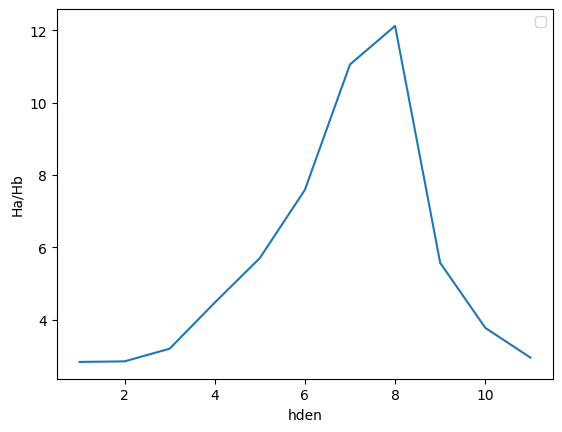

In [101]:
extension = 'emergent_elin'

ratio = []

for i, value in enumerate(values):

    # get tuple of line_id, wavelength, and line luminosity
    linelist = cloudy23.read_linelist(f'{model}/{i+1}', extension=extension)

    # convert tuple of arrays into a dictionary
    line_luminosity = dict(zip(linelist[0], linelist[2]))

    # get balmer decrement
    balmer_decrement = line_luminosity['H 1 6562.80A']/line_luminosity['H 1 4861.32A']
    ratio.append(balmer_decrement)

plt.plot(values, ratio)

plt.ylabel('Ha/Hb')
plt.xlabel(model)
plt.legend()
plt.show()


## Ionisation structure

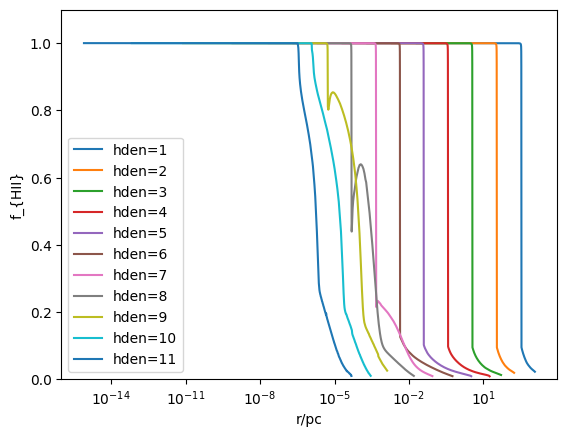

In [102]:



lws = np.linspace(4, 1, len(values))
alphas = np.linspace(0.1, 1., len(values))

zone = 'HII'

for i, v in enumerate(values):
    data = ascii.read(f'{model}/{i+1}.ovr')
    depth = data['depth'] * cm
    label = f'{model}={v}'
    plt.plot(depth.to('pc').value, data[zone], label=label)

        
plt.legend()
plt.xscale('log')
plt.xlabel('r/pc')
plt.ylabel('f_{HII}')
# plt.xlim(0, .00005)
plt.ylim(0.0, 1.1)
plt.show()

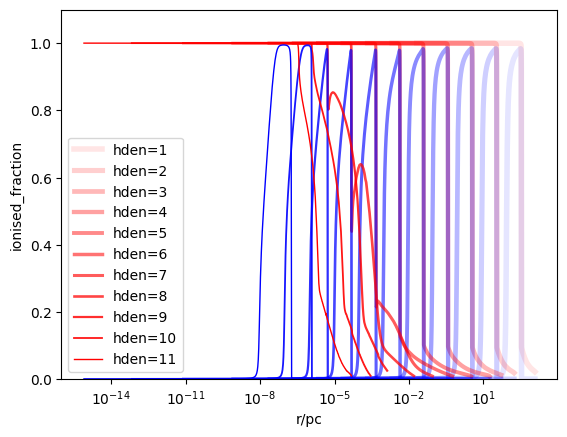

In [103]:
from unyt import cm, pc

convert_to_parsecs = (1*cm).to('pc').value

lws = np.linspace(4, 1, len(values))
alphas = np.linspace(0.1, 1., len(values))

zone = 'HII'

for i, (v, lw, alpha) in enumerate(zip(values, lws, alphas)):
    for zone, c in zip(['HII', 'O3'],['r', 'b']):
        data = ascii.read(f'{model}/{i+1}.ovr')
        data['depth'] *= convert_to_parsecs
        if zone == 'HII':
            label = f'{model}={v}'
        else:
            label = None
        plt.plot(data['depth'], data[zone], lw=lw, alpha=alpha, c=c, label=label)
        
plt.legend()
plt.xscale('log')
plt.xlabel('r/pc')
plt.ylabel('ionised_fraction')
# plt.xlim(0, .00005)
plt.ylim(0.0, 1.1)
plt.show()

## Plot transmitted specta

incident 8.670828191068306 erg/s
1 7.19 erg/s 0.83 dimensionless 
2 70.98 erg/s 8.19 dimensionless 
3 671.64 erg/s 77.46 dimensionless 
4 6065.51 erg/s 699.53 dimensionless 
5 56247.94 erg/s 6487.03 dimensionless 
6 509036.18 erg/s 58706.75 dimensionless 
7 4482719.11 erg/s 516988.58 dimensionless 
8 35315722.17 erg/s 4072935.29 dimensionless 
9 292746277.39 erg/s 33762204.82 dimensionless 
10 1909257811.97 erg/s 220193246.82 dimensionless 
11 13212675368.66 erg/s 1523807769.86 dimensionless 


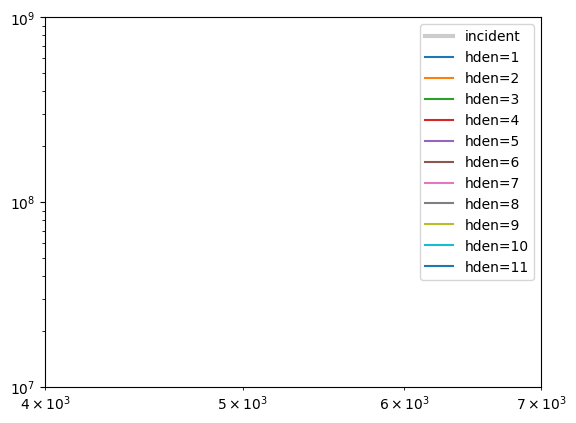

In [104]:

# get the input spectra
from unyt import c, h, erg, s, Angstrom

for i, (v, lw, alpha) in enumerate(zip(values, lws, alphas)):

    # get the output spectra
    x, incident, transmitted, nebular, total, linecont = np.loadtxt(f"{model}/{i+1}.cont", delimiter="\t", usecols=(0, 1, 2, 3, 4, 8)).T

    lam = x[::-1] * Angstrom
    nu = c / lam

    # plot incident
    if  i==0:
        incident_ = incident[::-1] * (erg / s) 
        plt.loglog(lam.to('Angstrom').value, incident_, label='incident', lw=3, c='k', alpha=0.2)

        incident_sed = Sed(lam=lam, lnu=incident_/nu)
        print('incident', incident_sed.bolometric_luminosity)

    label = f'{model}={v}'
    spectra = total[::-1] * (erg / s)
    # plt.loglog(lam.to('Angstrom').value, transmitted, label=label, lw=lw, alpha=alpha, c='r')
    # plt.loglog(lam.to('Angstrom').value, spectra, label=label)

    nebular_continuum = (nebular - linecont) * (erg / s) 


    plt.loglog(lam.to('Angstrom').value, nebular_continuum, label=label)

    sed = Sed(lam=lam, lnu=spectra/nu)
    print(f"{v} {sed.bolometric_luminosity:.2f} {sed.bolometric_luminosity/incident_sed.bolometric_luminosity:.2f} ")


plt.xlim([4000,7000])
plt.ylim(1E7, 1E9)
plt.legend()
plt.show()





## Plot Ha/L_bol

29973065385320.562 1/s
1.394752237136018e-22 erg
1.4541388890222067e-21 erg
1.7204112871703364e-20 erg
2.2252979180656684e-19 erg
2.5286702919988777e-18 erg
2.962926843094737e-17 erg
4.366587078013684e-16 erg
1.2193947976338793e-14 erg
1.4943416505519017e-13 erg
5.92465260783672e-13 erg
1.0732302347611872e-12 erg


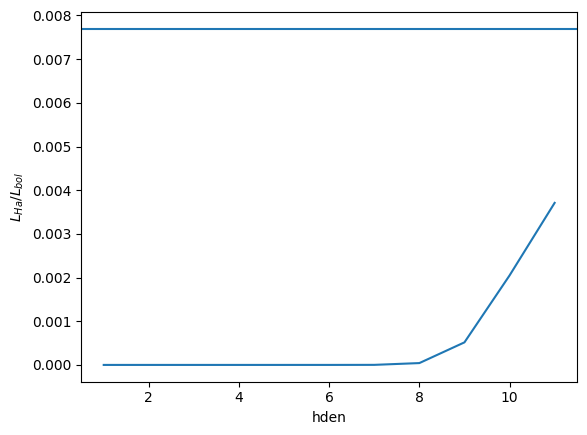

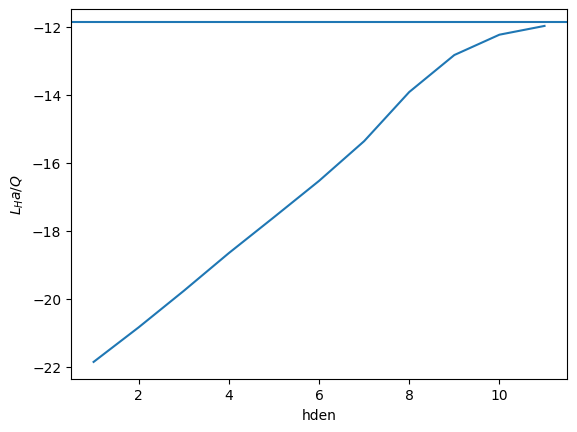

In [105]:

incident_lnu = incident[::-1] * (erg / s) / nu / 1E7
sed = Sed(lam=lam, lnu=incident_lnu)
bolometric_luminosity = sed.bolometric_luminosity
Q = sed.calculate_ionising_photon_production_rate()
print(Q)

# Case B correction factor
correction_factor = (1.08E-53 / 7.9E-42) * erg

extension = 'intrinsic_elin'

lines = ['H 1 6562.80A', 'H 1 4861.32A']

luminosity = {line : [] for line in lines}

bolometric_ratio = []
Q_ratio = []

for i, value in enumerate(values):

    # get tuple of line_id, wavelength, and line luminosity
    linelist = cloudy23.read_linelist(f'{model}/{i+1}', extension=extension)

    # convert tuple of arrays into a dictionary
    line_luminosity = dict(zip(linelist[0], linelist[2] * erg/s))

    bolometric_ratio.append(line_luminosity['H 1 6562.80A']/bolometric_luminosity)


    Q_rat = line_luminosity['H 1 6562.80A']/Q
    print(Q_rat)
    Q_ratio.append(Q_rat)


plt.axhline(1/130.)   
plt.plot(values, bolometric_ratio)   
plt.ylabel('$L_{Ha}/L_{bol}$')
plt.xlabel(model)

plt.show()

plt.plot(values, np.log10(np.array(Q_ratio)))
plt.axhline(np.log10(correction_factor.to('erg').value))   
plt.ylabel('$L_Ha/Q$')
plt.xlabel(model)
plt.show()